# Complex Systems
### **Author:** Alan Palma

# Exercise 2: Competition Dynamics Between Rabbits and Sheep

We study the system:
$$
\dot{x} = x(3 - x - 2y), \\ 
\dot{y} = y(2 - x - y).
$$

where:
- \(x(t)\): population of rabbits
- \(y(t)\): population of sheep


In [11]:
# Third-party libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scienceplots

# Define the style
plt.style.use(['science', 'notebook', 'no-latex']) # Use a specific style for figures

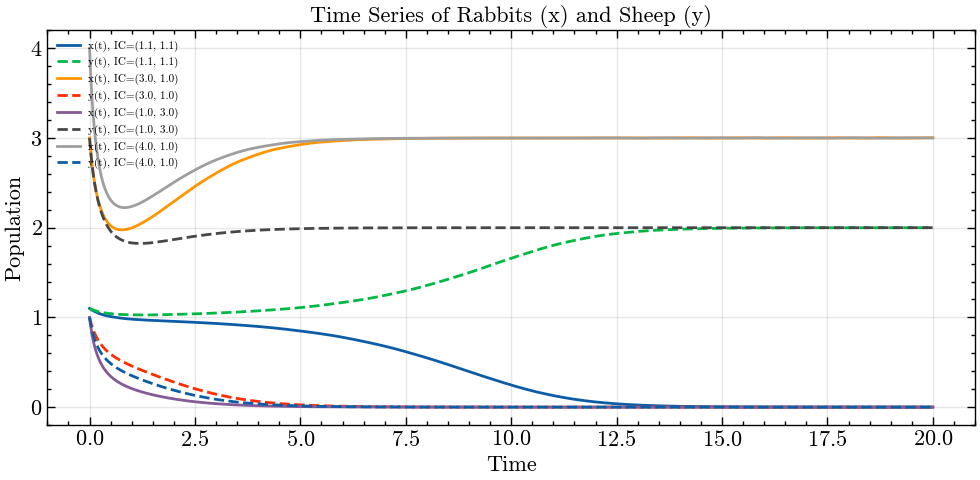

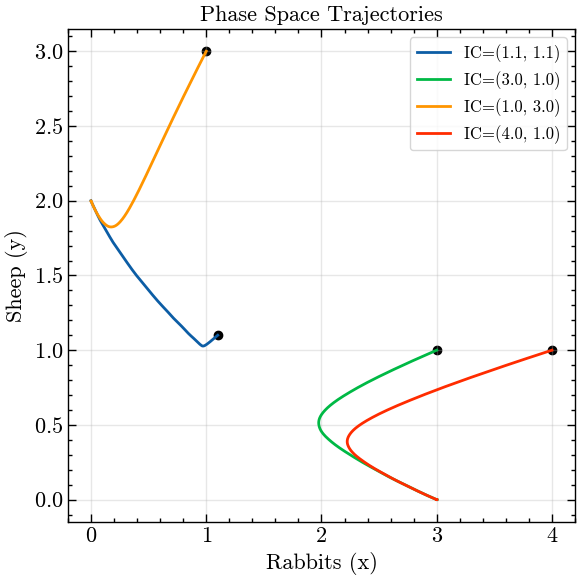

In [17]:

# Define the system of ODEs
def competition(t, z):
    x, y = z
    dxdt = x * (3 - x - 2*y)
    dydt = y * (2 - x - y)
    return [dxdt, dydt]

# Time span and initial conditions
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Example initial conditions
y0_list = [
    (1.1, 1.1),
    (3.0, 1.0),
    (1.0, 3.0),
    (4.0, 1.0)
]

# Solve for each initial condition
solutions = []
for y0 in y0_list:
    sol = solve_ivp(competition, t_span, y0, t_eval=t_eval, dense_output=True)
    solutions.append(sol)

# Plot time series
plt.figure(figsize=(10, 5))
for sol, y0 in zip(solutions, y0_list):
    plt.plot(sol.t, sol.y[0], label=f"x(t), IC={y0}")
    plt.plot(sol.t, sol.y[1], '--', label=f"y(t), IC={y0}")

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Time Series of Rabbits (x) and Sheep (y)")
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Phase space plot
plt.figure(figsize=(6,6))
for sol, y0 in zip(solutions, y0_list):
    plt.plot(sol.y[0], sol.y[1], label=f"IC={y0}")
    plt.scatter(sol.y[0][0], sol.y[1][0], marker='o', color='k') # initial point
plt.xlabel("Rabbits (x)")
plt.ylabel("Sheep (y)")
plt.title("Phase Space Trajectories")
plt.legend(frameon=True, fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/phase_space.png", dpi=300)
plt.show()

## Exercise 4: Simulation of the Third-Order System

We want to study the system:

$$
\frac{d^3x}{dt^3} + r \frac{d^2x}{dt^2} + \frac{dx}{dt} - |x| + 1 = 0,
$$

with parameter \( r > 0 \).  

We convert it into a first-order system:
$$
\begin{aligned}
x_1 &= x, \\
x_2 &= \dot x, \\
x_3 &= \ddot x,
\end{aligned}
$$

so that

$$
\begin{cases}
\dot x_1 = x_2, \\
\dot x_2 = x_3, \\
\dot x_3 = - r x_3 - x_2 + |x_1| - 1.
\end{cases}
$$


In [2]:
# Parameter
r = 0.6

# Slope function for the system
def slope(t, state):
    x1, x2, x3 = state
    dx1 = x2
    dx2 = x3
    dx3 = -r * x3 - x2 + abs(x1) - 1.0
    return [dx1, dx2, dx3]

# Time span and evaluation points
t_span = (0, 100)
t_eval = np.linspace(*t_span, 5000)


In [3]:
# Example initial condition
y0_1 = [-0.5, 0.0, 0.0]

# Solve the ODE
sol_1 = solve_ivp(slope, t_span, y0_1, t_eval=t_eval, method="RK45")

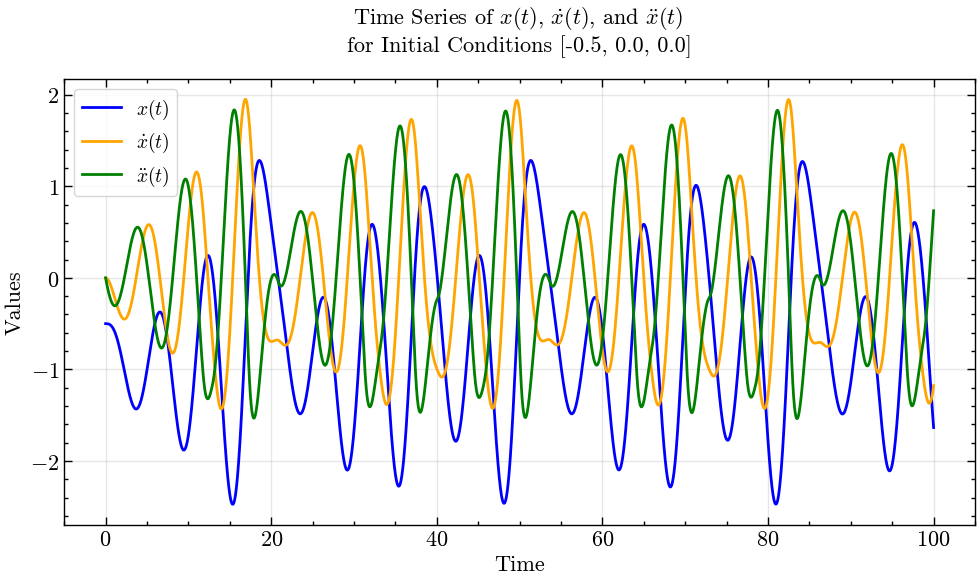

In [4]:
# Plotting x vs. t
x = sol_1.y[0]
dx = sol_1.y[1]
ddx = sol_1.y[2]    

plt.figure(figsize=(10, 6))

plt.plot(sol_1.t, x, label='$x(t)$', color='blue')
plt.plot(sol_1.t, dx, label='$\\dot{x}(t)$', color='orange')
plt.plot(sol_1.t, ddx, label='$\\ddot{x}(t)$', color='green')

plt.title('Time Series of $x(t)$, $\\dot{x}(t)$, and $\\ddot{x}(t)$ \n' \
              + f"for Initial Conditions {y0_1}", pad=20)
plt.xlabel('Time')
plt.ylabel('Values')

plt.legend(frameon=True, fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/time_series.png", dpi=300)
plt.show()

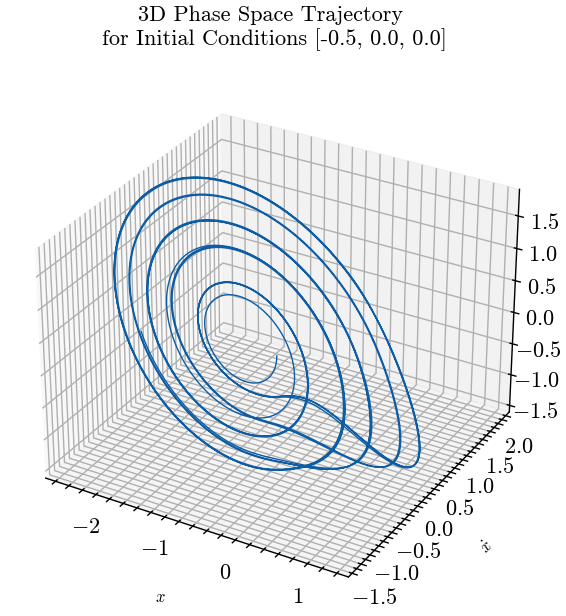

In [5]:
# Extract the solution for the first set of initial conditions
x = sol_1.y[0]
dx = sol_1.y[1]
ddx = sol_1.y[2]

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, dx, ddx, lw=1.0)
ax.set_xlabel("$x$", labelpad=15, fontsize=12)
ax.set_ylabel("$\\dot{x}$", labelpad=15, fontsize=12)
ax.set_zlabel("$\\ddot{x}$", labelpad=15, fontsize=12)
ax.set_title("3D Phase Space Trajectory \n" \
    + f"for Initial Conditions {y0_1}", pad=20)

plt.savefig("figures/phase_space_3d.png", dpi=300)
plt.show()


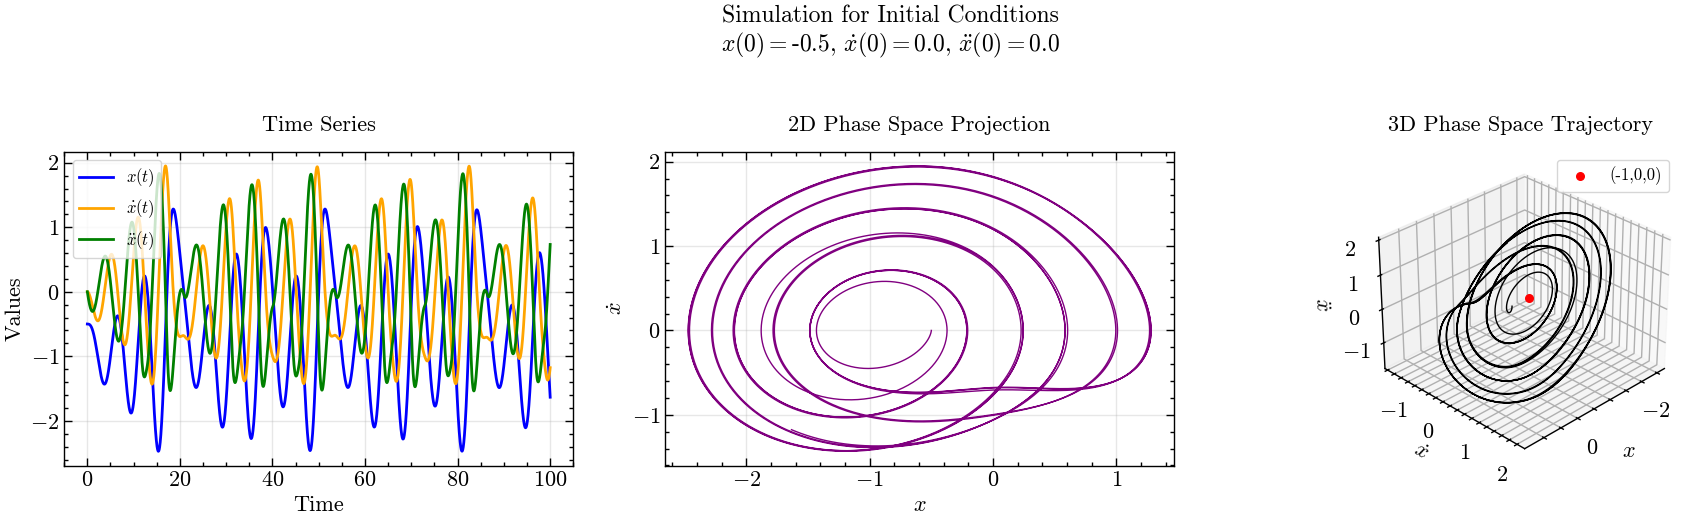

In [6]:
# Extract solution
x = sol_1.y[0]
dx = sol_1.y[1]
ddx = sol_1.y[2]
t = sol_1.t

# Create a 3-panel figure
fig = plt.figure(figsize=(18, 5))

# --- Panel 1: Time series ---
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(t, x, label='$x(t)$', color='blue')
ax1.plot(t, dx, label='$\\dot{x}(t)$', color='orange')
ax1.plot(t, ddx, label='$\\ddot{x}(t)$', color='green')
ax1.set_title("Time Series", pad=15)
ax1.set_xlabel("Time")
ax1.set_ylabel("Values")
ax1.legend(frameon = True,fontsize=12)
ax1.grid(alpha=0.3)

# --- Panel 2: 2D phase projection (x vs dx) ---
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x, dx, lw=1.0, color="purple")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\\dot{x}$")
ax2.set_title("2D Phase Space Projection", pad=15)
ax2.grid(alpha=0.3)

# --- Panel 3: 3D phase trajectory ---
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot(x, dx, ddx, lw=1.0, color="black")
ax3.scatter([-1.0],[0.0],[0.0], color='red', s=30, label='(-1,0,0)')
ax3.set_xlabel("$x$")
ax3.set_ylabel("$\\dot{x}$")
ax3.set_zlabel("$\\ddot{x}$")
ax3.set_title("3D Phase Space Trajectory", pad=15)
ax3.view_init(elev=30, azim=45)
ax3.legend(frameon=True, fontsize=12)

plt.suptitle("Simulation for Initial Conditions\n" 
             + r"$x(0)=$" + f"{y0_1[0]}, " 
             + r"$\dot{x}(0)=$" + f"{y0_1[1]}, " 
             + r"$\ddot{x}(0)=$" + f"{y0_1[2]}", fontsize=17, y=1.05)

plt.tight_layout()
plt.savefig("figures/system_summary1.png", dpi=300, bbox_inches="tight")
plt.show()


Test with other initial conditions:

In [7]:
# Example initial condition
y0_1 = [0.5, -1.0, 1.0]

# Solve the ODE
sol_1 = solve_ivp(slope, t_span, y0_1, t_eval=t_eval, method="RK45")

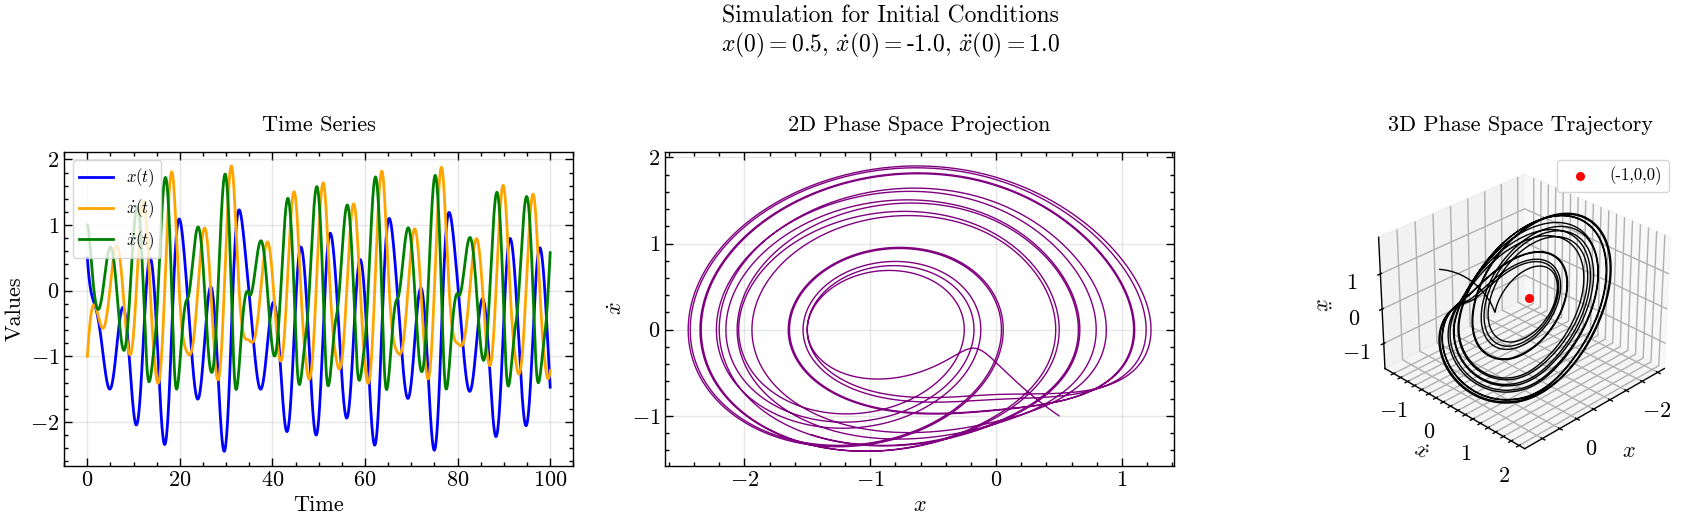

In [8]:
# Extract solution
x = sol_1.y[0]
dx = sol_1.y[1]
ddx = sol_1.y[2]
t = sol_1.t

# Create a 3-panel figure
fig = plt.figure(figsize=(18, 5))

# --- Panel 1: Time series ---
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(t, x, label='$x(t)$', color='blue')
ax1.plot(t, dx, label='$\\dot{x}(t)$', color='orange')
ax1.plot(t, ddx, label='$\\ddot{x}(t)$', color='green')
ax1.set_title("Time Series", pad=15)
ax1.set_xlabel("Time")
ax1.set_ylabel("Values")
ax1.legend(frameon = True, fontsize=12)
ax1.grid(alpha=0.3)

# --- Panel 2: 2D phase projection (x vs dx) ---
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x, dx, lw=1.0, color="purple")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\\dot{x}$")
ax2.set_title("2D Phase Space Projection", pad=15)
ax2.grid(alpha=0.3)

# --- Panel 3: 3D phase trajectory ---
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot(x, dx, ddx, lw=1.0, color="black")
ax3.scatter([-1.0],[0.0],[0.0], color='red', s=30, label='(-1,0,0)')
ax3.set_xlabel("$x$")
ax3.set_ylabel("$\\dot{x}$")
ax3.set_zlabel("$\\ddot{x}$")
ax3.set_title("3D Phase Space Trajectory", pad=15)
ax3.legend(frameon=True, fontsize=12)
ax3.view_init(elev=30, azim=45) 

plt.suptitle("Simulation for Initial Conditions\n" 
             + r"$x(0)=$" + f"{y0_1[0]}, " 
             + r"$\dot{x}(0)=$" + f"{y0_1[1]}, " 
             + r"$\ddot{x}(0)=$" + f"{y0_1[2]}", fontsize=17, y=1.05)

plt.tight_layout()
plt.savefig("figures/system_summary2.png", dpi=300, bbox_inches="tight")
plt.show()


In [9]:

# Time span and evaluation points
t_span = (0, 10)
t_eval = np.linspace(*t_span, 200000)


# Example initial condition
y0_1 = [2.0, 0.5, 0.5]

# Solve the ODE
sol_1 = solve_ivp(slope, t_span, y0_1, t_eval=t_eval, method="RK45", rtol=1e-6, atol=1e-9)

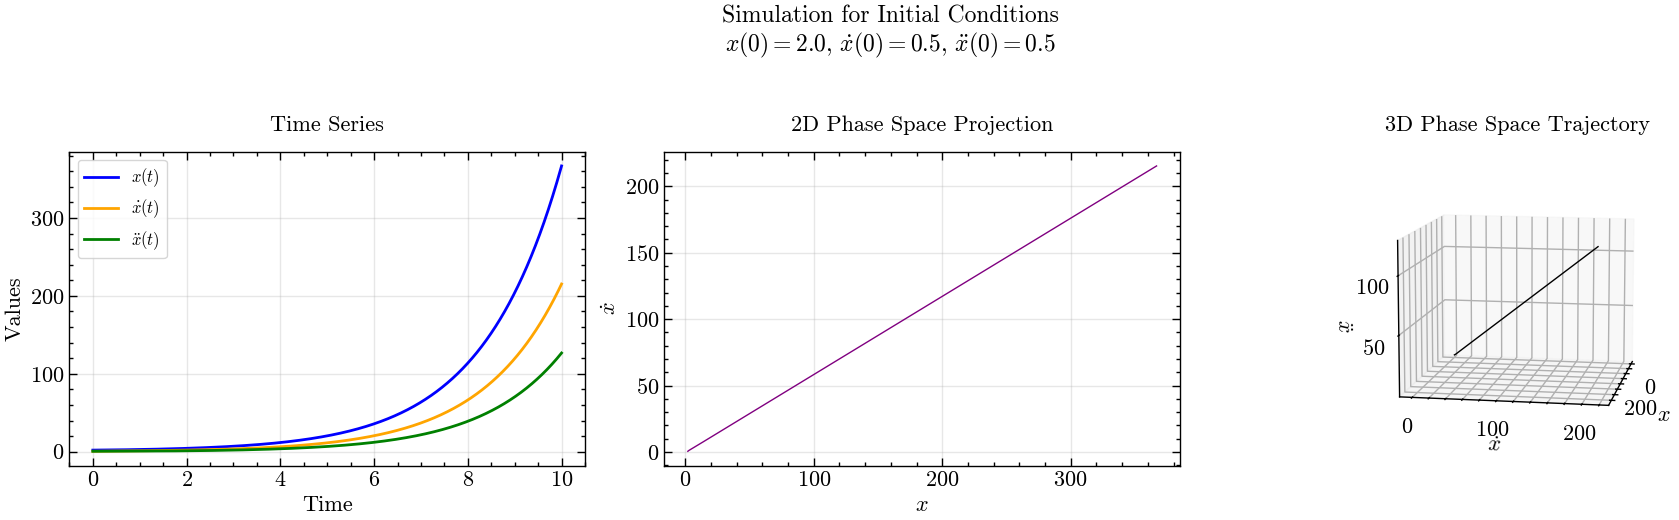

In [10]:
# Extract solution
x = sol_1.y[0]
dx = sol_1.y[1]
ddx = sol_1.y[2]
t = sol_1.t

# Create a 3-panel figure
fig = plt.figure(figsize=(18, 5))

# --- Panel 1: Time series ---
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(t, x, label='$x(t)$', color='blue')
ax1.plot(t, dx, label='$\\dot{x}(t)$', color='orange')
ax1.plot(t, ddx, label='$\\ddot{x}(t)$', color='green')
ax1.set_title("Time Series", pad=15)
ax1.set_xlabel("Time")
ax1.set_ylabel("Values")
ax1.legend(frameon = True, fontsize=12)
ax1.grid(alpha=0.3)

# --- Panel 2: 2D phase projection (x vs dx) ---
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x, dx, lw=1.0, color="purple")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\\dot{x}$")
ax2.set_title("2D Phase Space Projection", pad=15)
ax2.grid(alpha=0.3)

# --- Panel 3: 3D phase trajectory ---
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot(x, dx, ddx, lw=1.0, color="black")
ax3.set_xlabel("$x$")
ax3.set_ylabel("$\\dot{x}$")
ax3.set_zlabel("$\\ddot{x}$")
ax3.set_title("3D Phase Space Trajectory", pad=15)
ax3.view_init(elev=10, azim=10) 

plt.suptitle("Simulation for Initial Conditions\n" 
             + r"$x(0)=$" + f"{y0_1[0]}, " 
             + r"$\dot{x}(0)=$" + f"{y0_1[1]}, " 
             + r"$\ddot{x}(0)=$" + f"{y0_1[2]}", fontsize=17, y=1.05)

plt.tight_layout()
plt.savefig("figures/system_summary3.png", dpi=300, bbox_inches="tight")
plt.show()
